In [2]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz
!pip install scikit-learn

Requirement already up-to-date: pandas-profiling[notebook] in c:\users\mohsen\anaconda3\lib\site-packages (3.0.0)


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [3]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats


# Data Preparation

# reading file




In [4]:
customer_churn = pd.read_csv("C:/Users/Mohsen/Downloads/churn.csv") 
df=pd.DataFrame(customer_churn)

# Let's display first 10 records 


In [5]:
df.head(10)

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


# look at meta information about data, such as null values
# Look at the attribute type
# Find any missing values


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Intl Plan       3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

# Let's see meta information about numeric data, we can also see if there any extreme values


In [7]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Extracting 21th column


In [8]:
churn=df.iloc[:,20] 
churn.head()

0    False.
1    False.
2    False.
3    False.
4    False.
Name: Churn, dtype: object

In [9]:
# will return max value of each column
df.max(axis=0)

State                   WY
Account Length         243
Area Code              510
Phone             422-9964
Intl Plan              yes
VMail Plan             yes
VMail Message           51
Day Mins             350.8
Day Calls              165
Day Charge           59.64
Eve Mins             363.7
Eve Calls              170
Eve Charge           30.91
Night Mins             395
Night Calls            175
Night Charge         17.77
Intl Mins               20
Intl Calls              20
Intl Charge            5.4
CustServ Calls           9
Churn                True.
dtype: object

In [26]:
# will return min value of each column
df.min(axis=0)

State                   AK
Account Length           1
Area Code              408
Phone             327-1058
Int'l Plan              no
VMail Plan              no
VMail Message            0
Day Mins                 0
Day Calls                0
Day Charge               0
Eve Mins                 0
Eve Calls                0
Eve Charge               0
Night Mins            23.2
Night Calls             33
Night Charge          1.04
Intl Mins                0
Intl Calls               0
Intl Charge              0
CustServ Calls           0
Churn               False.
dtype: object

In [27]:
# will return std value of each column
df.std(axis=0)

Account Length    39.822106
Area Code         42.371290
VMail Message     13.688365
Day Mins          54.467389
Day Calls         20.069084
Day Charge         9.259435
Eve Mins          50.713844
Eve Calls         19.922625
Eve Charge         4.310668
Night Mins        50.573847
Night Calls       19.568609
Night Charge       2.275873
Intl Mins          2.791840
Intl Calls         2.461214
Intl Charge        0.753773
CustServ Calls     1.315491
dtype: float64

# Determine any outlier values for each of the attributes under consideration

In [11]:
Churn_df = pd.DataFrame(customer_churn, columns=['VMail Message','Day Mins','Day Calls','Day Charge','Eve Calls','Eve Mins','Eve Charge','Night Mins'
                                          ,'Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls','Churn'])


In [12]:
Churn_df

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Calls,Eve Mins,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,25,265.1,110,45.07,99,197.4,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,26,161.6,123,27.47,103,195.5,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0,243.4,114,41.38,110,121.2,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0,299.4,71,50.90,88,61.9,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0,166.7,113,28.34,122,148.3,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,77,26.55,126,215.5,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,0,231.1,57,39.29,55,153.4,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,0,180.8,109,30.74,58,288.8,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,0,213.8,105,36.35,84,159.6,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [13]:
Churn_df = Churn_df.replace({'Churn': {'True.': 1,'False.': 0}})
Churn_df

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Calls,Eve Mins,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,25,265.1,110,45.07,99,197.4,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,103,195.5,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,110,121.2,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,299.4,71,50.90,88,61.9,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,166.7,113,28.34,122,148.3,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,77,26.55,126,215.5,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,0,231.1,57,39.29,55,153.4,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,0,180.8,109,30.74,58,288.8,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,0,213.8,105,36.35,84,159.6,13.57,139.2,137,6.26,5.0,10,1.35,2,0


# boxplot for finding outliers

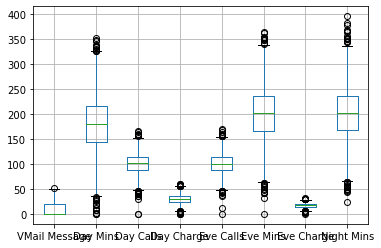

In [14]:
df_1_1 = pd.DataFrame(customer_churn, columns=['VMail Message','Day Mins','Day Calls','Day Charge','Eve Calls','Eve Mins','Eve Charge','Night Mins'
                                           ])
boxplot = df_1_1.boxplot(column=['VMail Message','Day Mins','Day Calls','Day Charge','Eve Calls','Eve Mins','Eve Charge','Night Mins'])


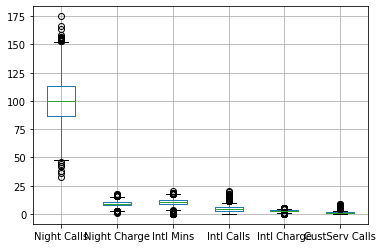

In [32]:
df_1_2 = pd.DataFrame(customer_churn, columns=['Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls'])
boxplot = df_1_2.boxplot(column=[ 'Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls'])


# Outlier Treatment

In [15]:
print(df['VMail Message'].quantile(0.1))
print(df['VMail Message'].quantile(0.9))

0.0
32.0


In [16]:
df['VMail Message']=np.where(df['VMail Message']<0.0,0.0,df['VMail Message'])
df['VMail Message']=np.where(df['VMail Message']>32.0,32.0,df['VMail Message'])

In [17]:
print(df['Day Mins'].quantile(0.1))
print(df['Day Mins'].quantile(0.9))

110.32
249.58


In [18]:
df['Day Mins']=np.where(df['Day Mins']<110.32,110.32,df['Day Mins'])
df['Day Mins']=np.where(df['Day Mins']>249.58,249.58,df['Day Mins'])

In [19]:
print(df['Eve Calls'].quantile(0.1))
print(df['Eve Calls'].quantile(0.9))

75.0
125.0


In [20]:
df['Eve Calls']=np.where(df['Eve Calls']<75.0,75.0,df['Eve Calls'])
df['Eve Calls']=np.where(df['Eve Calls']>125.0,125.0,df['Eve Calls'])

In [21]:
print(df['Day Charge'].quantile(0.1))
print(df['Day Charge'].quantile(0.9))

18.754
42.428000000000004


In [22]:
df['Day Charge']=np.where(df['Day Charge']<18.754,18.754,df['Day Charge'])
df['Day Charge']=np.where(df['Day Charge']>42.42,42.42,df['Day Charge'])

In [23]:
print(df['Eve Mins'].quantile(0.1))
print(df['Eve Mins'].quantile(0.9))

136.72
265.8


In [55]:
df['Eve Mins']=np.where(df['Eve Mins']<136.724,136.72,df['Eve Mins'])
df['Eve Mins']=np.where(df['Eve Mins']>265.8,265.8,df['Eve Mins'])

In [24]:
print(df['Eve Charge'].quantile(0.1))
print(df['Eve Charge'].quantile(0.9))

11.622
22.59


In [25]:
df['Eve Charge']=np.where(df['Eve Charge']<11.622,11.622,df['Eve Charge'])
df['Eve Charge']=np.where(df['Eve Charge']>22.59,22.59,df['Eve Charge'])

In [26]:
print(df['Night Mins'].quantile(0.1))
print(df['Night Mins'].quantile(0.9))

136.34000000000003
264.2


In [58]:
df['Night Mins']=np.where(df['Eve Charge']<136.4,136.34,df['Eve Charge'])
df['Night Mins']=np.where(df['Eve Charge']>264.2,264.2,df['Eve Charge'])

In [59]:
print(df['Night Calls'].quantile(0.1))
print(df['Night Calls'].quantile(0.9))

75.0
125.0


In [27]:
df['Night Calls']=np.where(df['Night Calls']<75,75,df['Night Calls'])
df['Night Calls']=np.where(df['Night Calls']>125,125,df['Night Calls'])

In [28]:
print(df['Night Charge'].quantile(0.1))
print(df['Night Charge'].quantile(0.9))

6.132
11.89


In [29]:
df['Night Charge']=np.where(df['Night Charge']<6.132,6.132,df['Night Charge'])
df['Night Charge']=np.where(df['Night Charge']>11.89,11.89,df['Night Charge'])

In [30]:
print(df['Intl Mins'].quantile(0.1))
print(df['Intl Mins'].quantile(0.9))

6.7
13.7


In [31]:
df['Intl Mins']=np.where(df['Intl Mins']<6.7,6.7,df['Intl Mins'])
df['Intl Mins']=np.where(df['Intl Mins']>13.7,13.7,df['Intl Mins'])

In [32]:
print(df['Intl Charge'].quantile(0.1))
print(df['Intl Charge'].quantile(0.9))

1.81
3.7


In [33]:
df['Intl Mins']=np.where(df['Intl Mins']<1.81,1.81,df['Intl Mins'])
df['Intl Mins']=np.where(df['Intl Mins']>3.7,3.7,df['Intl Mins'])

In [34]:
print(df['CustServ Calls'].quantile(0.1))
print(df['CustServ Calls'].quantile(0.9))

0.0
3.0


In [35]:
df['CustServ Calls']=np.where(df['CustServ Calls']<0.0,0.0,df['CustServ Calls'])
df['CustServ Calls']=np.where(df['CustServ Calls']>3,3,df['CustServ Calls'])

In [36]:
df


,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25.0,249.58,110,42.42,...,99.0,16.780,244.7,91,11.01,3.7,3,2.70,1.0,False.
1,OH,107,415,371-7191,no,yes,26.0,161.60,123,27.47,...,103.0,16.620,254.4,103,11.45,3.7,3,3.70,1.0,False.
2,NJ,137,415,358-1921,no,no,0.0,243.40,114,41.38,...,110.0,11.622,162.6,104,7.32,3.7,5,3.29,0.0,False.
3,OH,84,408,375-9999,yes,no,0.0,249.58,71,42.42,...,88.0,11.622,196.9,89,8.86,3.7,7,1.78,2.0,False.
4,OK,75,415,330-6626,yes,no,0.0,166.70,113,28.34,...,122.0,12.610,186.9,121,8.41,3.7,3,2.73,3.0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,32.0,156.20,77,26.55,...,125.0,18.320,279.1,83,11.89,3.7,6,2.67,2.0,False.
3329,WV,68,415,370-3271,no,no,0.0,231.10,57,39.29,...,75.0,13.040,191.3,123,8.61,3.7,4,2.59,3.0,False.
3330,RI,28,510,328-8230,no,no,0.0,180.80,109,30.74,...,75.0,22.590,191.9,91,8.64,3.7,6,3.81,2.0,False.
3331,CT,184,510,364-6381,yes,no,0.0,213.80,105,36.35,...,84.0,13.570,139.2,125,6.26,3.7,10,1.35,2.0,False.


# Plot histograms for attributes and analyze whether they have any influence on the class attribute

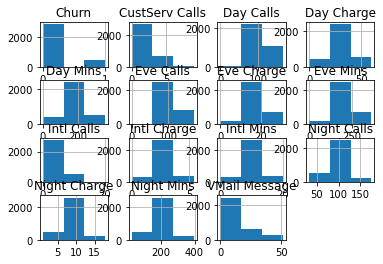

In [37]:

hist = Churn_df.hist(bins=3)

# Which attributes seem to be correlated

In [38]:
correlation =df.corr(method='pearson')

In [39]:
correlation

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000e+00,-1.246350e-02,-5.003728e-03,1.198440e-02,3.846988e-02,1.198355e-02,-6.757142e-03,1.749865e-02,-7.296305e-03,-8.955192e-03,-6.607184e-03,-1.148131e-02,3.302300e-16,2.066143e-02,9.545675e-03,-5.725074e-03
Area Code,-1.246350e-02,1.000000e+00,-1.703552e-03,-9.618796e-03,-9.646044e-03,-9.613301e-03,3.580395e-03,-1.359539e-02,7.615229e-03,-5.824660e-03,1.236171e-02,-4.653115e-03,8.965182e-17,-2.417859e-02,-1.839470e-02,3.518711e-02
VMail Message,-5.003728e-03,-1.703552e-03,1.000000e+00,5.892091e-03,-1.017599e-02,5.904655e-03,2.149022e-02,-8.792627e-03,2.181739e-02,7.495058e-03,1.026382e-02,6.684718e-03,2.978633e-16,1.525414e-02,3.345152e-03,-1.999499e-02
Day Mins,1.198440e-02,-9.618796e-03,5.892091e-03,1.000000e+00,9.561125e-03,9.999999e-01,3.347905e-03,1.765660e-02,6.057466e-03,-3.596546e-03,2.265758e-02,-7.289751e-03,1.829432e-15,-9.906951e-04,-1.183654e-02,-8.170439e-03
Day Calls,3.846988e-02,-9.646044e-03,-1.017599e-02,9.561125e-03,1.000000e+00,9.560580e-03,-2.145141e-02,8.590423e-03,-1.837696e-02,2.293785e-02,-1.324895e-02,1.870564e-02,1.925934e-16,4.574268e-03,2.166610e-02,-2.211575e-02
Day Charge,1.198355e-02,-9.613301e-03,5.904655e-03,9.999999e-01,9.560580e-03,1.000000e+00,3.348661e-03,1.764440e-02,6.055559e-03,-3.589327e-03,2.266021e-02,-7.283368e-03,-1.167981e-14,-9.954721e-04,-1.184126e-02,-8.183880e-03
Eve Mins,-6.757142e-03,3.580395e-03,2.149022e-02,3.347905e-03,-2.145141e-02,3.348661e-03,1.000000e+00,-1.545130e-02,9.696351e-01,-1.258368e-02,5.369787e-03,-1.219095e-02,-5.245231e-16,2.541292e-03,-1.106662e-02,-1.688642e-02
Eve Calls,1.749865e-02,-1.359539e-02,-8.792627e-03,1.765660e-02,8.590423e-03,1.764440e-02,-1.545130e-02,1.000000e+00,-1.272716e-02,1.703917e-03,4.698730e-03,5.779132e-03,-8.306211e-17,1.757240e-02,8.956429e-03,3.760066e-04
Eve Charge,-7.296305e-03,7.615229e-03,2.181739e-02,6.057466e-03,-1.837696e-02,6.055559e-03,9.696351e-01,-1.272716e-02,1.000000e+00,-1.328296e-02,8.787130e-04,-1.343779e-02,-1.940053e-14,1.463085e-02,7.345842e-04,-2.045990e-02
Night Mins,-8.955192e-03,-5.824660e-03,7.495058e-03,-3.596546e-03,2.293785e-02,-3.589327e-03,-1.258368e-02,1.703917e-03,-1.328296e-02,1.000000e+00,1.062400e-02,9.682669e-01,2.183712e-15,-1.235343e-02,-1.517985e-02,-6.850346e-03


# we could see that correaltions between attributes is so low

# Data Pre-Processing and selselction
# let select features for the modeling
# Also we choose the target data type to be integer,as it is a requirement by the skitlearn algorithm

In [40]:
Churn=df.iloc[:,20]
Churn.value_counts()

False.    2850
True.      483
Name: Churn, dtype: int64

In [41]:
# Let's develop a decison tree in Python 
Churn_df

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Calls,Eve Mins,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,25,265.1,110,45.07,99,197.4,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,103,195.5,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,110,121.2,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,299.4,71,50.90,88,61.9,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,166.7,113,28.34,122,148.3,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,77,26.55,126,215.5,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,0,231.1,57,39.29,55,153.4,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,0,180.8,109,30.74,58,288.8,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,0,213.8,105,36.35,84,159.6,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [42]:
## First split the data into train and test set
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Churn' 
feature_names=Churn_df.columns[Churn_df.columns != class_col_name ]


In [43]:
Churn_df.loc[:, feature_names]=np.array(Churn_df.loc[:, feature_names])
Churn_df.loc[:, feature_names][0:5]

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Calls,Eve Mins,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,25.0,265.1,110.0,45.07,99.0,197.4,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,26.0,161.6,123.0,27.47,103.0,195.5,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,0.0,243.4,114.0,41.38,110.0,121.2,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,0.0,299.4,71.0,50.90,88.0,61.9,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,0.0,166.7,113.0,28.34,122.0,148.3,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0


# Normalize the dataset

In [44]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(Churn_df.loc[:, feature_names], Churn_df[class_col_name], test_size=0.3,random_state=1)   

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# section one 

# Tree Algorithm

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [47]:
from sklearn.model_selection import train_test_split


In [48]:
from sklearn import tree

In [49]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [50]:
clf = clf.fit(X_train, y_train)

In [329]:
print("Successfuly trained the decision tree...")


Successfuly trained the decision tree...


In [330]:
y_pred = clf.predict(X_test) 

In [331]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[831  24]
 [ 68  77]]
TP:  77 , FP:  24 , TN:  831 , FN: 68


In [332]:

#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95       855
           1       0.76      0.53      0.63       145

    accuracy                           0.91      1000
   macro avg       0.84      0.75      0.79      1000
weighted avg       0.90      0.91      0.90      1000



In [333]:
customer_churn = pd.read_csv("C:/Users/Mohsen/Downloads/churn.csv") 
df=pd.DataFrame(customer_churn)
df

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [334]:
features_response=df.columns.tolist()
items_to_remove=['State','Account Length','Area Code','Phone','Intl Plan','VMail Plan','VMail Message']

In [335]:
features_response=[item for item in features_response if item not in items_to_remove]
features_response

['Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn']

In [173]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values,df['Churn'].values,test_size=0.2, random_state=24)

In [176]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [177]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [336]:
conda install python-graphviz


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [141]:
conda install -c anaconda graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [339]:

import graphviz

In [340]:
dot_data=tree.export_graphviz(dt, out_file=None,filled=True, rounded=True, feature_names=features_response[:-1],proportion=True, 
                              class_names=['Not defaulted','Defaulted'])
filled=True
rounded=True
feature_names=features_response[:-1]
proportion=True
class_names=['Not defaulted','Defaulted']

In [341]:
graph = graphviz.Source(dot_data)

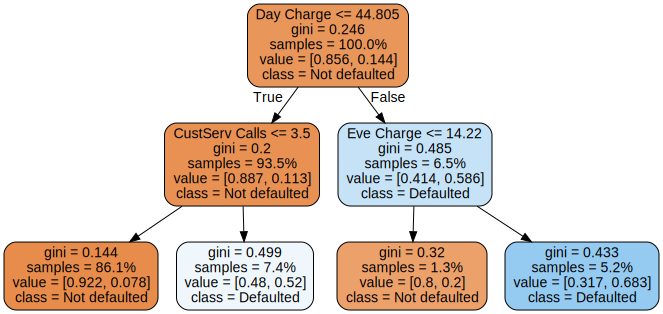

In [342]:
graph

# In a similar way, we can train and test Naive Bayes

In [401]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(Churn_df.loc[:, feature_names], Churn_df[class_col_name], test_size=0.3,random_state=1)   
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()
# Normalize

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()


TP:  1 , FP:  14 , TN:  841 , FN: 144
Confusion Matrix
[[841  14]
 [144   1]]


In [402]:
print ("Total Columns (including class)",len(Churn_df.columns))

Total Columns (including class) 15


In [ ]:
#Let's understand our Naive Bayes model

In [403]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  13
Classes  [0 1]
Number of records for classes  [1995.  338.]
Log prior probability for classes  [-0.15651094 -1.93186438]
Log conditional probability for each feature given a class
 [[-1.68600786 -2.24771531 -3.45793169 -1.56324472 -2.25370791 -4.02830578
  -1.55588482 -2.25441677 -4.6569167  -4.53716383 -5.33930742 -5.84617856
  -6.49470303]
 [-1.5802867  -2.29538396 -3.35215717 -1.56107794 -2.30528329 -4.02602198
  -1.59307681 -2.31540052 -4.6938544  -4.5489194  -5.53525801 -5.85731383
  -6.07170674]]


In [392]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,rounded=True, feature_names=features_response[:-1]
                               ,proportion=True, class_names=['Not defaulted','Defaulted'])

In [393]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="Day Charge <= 44.805\\ngini = 0.246\\nsamples = 100.0%\\nvalue = [0.856, 0.144]\\nclass = Not defaulted", fillcolor="#e9965a"] ;\n1 [label="CustServ Calls <= 3.5\\ngini = 0.2\\nsamples = 93.5%\\nvalue = [0.887, 0.113]\\nclass = Not defaulted", fillcolor="#e89152"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.144\\nsamples = 86.1%\\nvalue = [0.922, 0.078]\\nclass = Not defaulted", fillcolor="#e78c4a"] ;\n1 -> 2 ;\n3 [label="gini = 0.499\\nsamples = 7.4%\\nvalue = [0.48, 0.52]\\nclass = Defaulted", fillcolor="#eff7fd"] ;\n1 -> 3 ;\n4 [label="Eve Charge <= 14.22\\ngini = 0.485\\nsamples = 6.5%\\nvalue = [0.414, 0.586]\\nclass = Defaulted", fillcolor="#c5e2f7"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.32\\nsamples = 1.3%\\nvalue = [0.8, 0.2]\\nclass = Not defaulted", fill

# Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. 
# This means, it used different values of each feature as frequencies which semantically may or may not be correct, as a higher value (like 2 ,3 and more) would mean more weight. We can solve this using one-hot encoding later but some people use this form of encoding in practice too.
# For now, let's see classification report.

In [404]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       855
           1       0.07      0.01      0.01       145

    accuracy                           0.84      1000
   macro avg       0.46      0.50      0.46      1000
weighted avg       0.74      0.84      0.78      1000



In [384]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.851
Precision: 0.3333333333333333
Recall: 0.034722222222222224


# Section 2: Categorical to One-Hot (numeric) Encoding

In [ ]:
# Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [396]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
cat_cols=["VMail Message","Day Mins","Day Calls","Day Charge","Eve Calls","Eve Mins","Eve Charge","Night Mins","Night Calls"
         ,"Night Charge","Intl Mins","Intl Calls","Intl Charge","CustServ Calls"]



In [397]:
# Create a copy of the data frame in memory with a different name
df_onehot=Churn_df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(Churn_df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot

,Churn,VMail Message_0.0,VMail Message_4.0,VMail Message_8.0,VMail Message_9.0,VMail Message_10.0,VMail Message_11.0,VMail Message_12.0,VMail Message_13.0,VMail Message_14.0,...,CustServ Calls_0.0,CustServ Calls_1.0,CustServ Calls_2.0,CustServ Calls_3.0,CustServ Calls_4.0,CustServ Calls_5.0,CustServ Calls_6.0,CustServ Calls_7.0,CustServ Calls_8.0,CustServ Calls_9.0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3329,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3330,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3331,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [398]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="Churn"
# Uncomment following line for class name for bank dataset
# class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="ChurnChurn_df"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [399]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


# Let's look at Naive Bayes output

In [377]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  9672
Classes  [0 1]
Number of records for classes  [1994.  339.]
Log prior probability for classes  [-0.15701232 -1.92891016]
Log conditional probability for each feature given a class
 [[ -3.29164221 -10.53444013  -9.43582784 ...  -9.14814577  -9.84129295
  -10.53444013]
 [ -3.91327222  -9.5762327   -9.5762327  ...  -8.47762042  -8.88308552
   -8.88308552]]


# We have probailities of a lot more features now.
# See evaluation metrics below.

In [382]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[846  10]
 [139   5]]
TP:  5 , FP:  10 , TN:  846 , FN: 139


In [383]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       856
           1       0.33      0.03      0.06       144

    accuracy                           0.85      1000
   macro avg       0.60      0.51      0.49      1000
weighted avg       0.78      0.85      0.80      1000



# Let's run decision tree on one-hot encoded data

In [405]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)


In [406]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[832  23]
 [ 75  70]]
TP:  70 , FP:  23 , TN:  832 , FN: 75


In [360]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       856
           1       0.52      0.08      0.14       144

    accuracy                           0.86      1000
   macro avg       0.69      0.54      0.53      1000
weighted avg       0.82      0.86      0.81      1000



# Logistic Regression

In [52]:
# instantiate the model (using the default parameters)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred=logreg.predict(X_test)

In [301]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [60]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
tn, fp, fn, tp=cnf_matrix.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)


TP:  13 , FP:  17 , TN:  838 , FN: 132


In [56]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

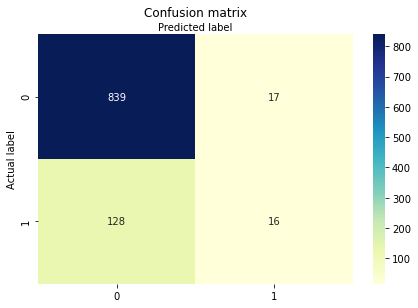

In [366]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.851
Precision: 0.43333333333333335
Recall: 0.0896551724137931


# CIND 119 course at Ryerson
#  by Professor Syed Shariyar Murtaza,Ph.D.
#      Students : Wei Hao Zhu,Armin Vaziri, Mohsen Selseleh